In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
a = np.array([[1,2],
              [3,4],
              [5,6]])
print("Shape:", a.shape)
print("Size:", a.size)
print("Number of rows:", a.shape[0])
print("Number of columns:", a.shape[1])

Shape: (3, 2)
Size: 6
Number of rows: 3
Number of columns: 2


In [ ]:
print("First Row:", a[0])
print("Second Row:", a[1])

# NumPy Array Slicing
print("First Column:", a[:,0]) # equal to a[0:3,0]
print("First Two Rows:", a[:2]) #equal to a[0:2]
print("The second element of the third row:", a[2,1])

First Row: [1 2]
Second Row: [3 4]
First Column: [1 3 5]
First Two Rows: [[1 2]
 [3 4]]
The second element of the third row: 6


In [ ]:
a_tensor = tf.Variable(a)
print(a_tensor)
print(type(a_tensor))

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int64, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]])>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


In [ ]:
a_tensor = tf.convert_to_tensor(a, dtype=float)
print(a_tensor)
print(type(a_tensor))

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
a = np.array([[1,2,3],
              [3,4,5],
              [5,6,7]])

b = np.array([[2,4,6],
              [0,5,-1],
              [5,1,3]])

print("A+B=\n", a+b)
print("\nA-B=\n", a-b)

A+B=
 [[ 3  6  9]
 [ 3  9  4]
 [10  7 10]]

A-B=
 [[-1 -2 -3]
 [ 3 -1  6]
 [ 0  5  4]]


In [ ]:
a = np.array([[1,2,3],
              [3,4,5],
              [5,6,7]])

b = np.array([[2,4,6],
              [0,5,-1],
              [5,1,3]])

print("A's shape:", a.shape)
print("B's shape:", b.shape)

print("Matrix multiplication")
print(a @ b) # similar to print(np.matmul(a,b))


print("Element-wise")
print(a * b) # similar to print(np.multiply(a,b))

A's shape: (3, 3)
B's shape: (3, 3)
Matrix multiplication
[[17 17 13]
 [31 37 29]
 [45 57 45]]
Element-wise
[[ 2  8 18]
 [ 0 20 -5]
 [25  6 21]]


In [ ]:
c = np.array([[10,20,30],
              [-5,0,-10]])
print("C:", c.shape)

d = np.array([[15,25,-30],
              [-13,13,22]])
print("D:", d.shape)

print("Element-wise:", c*d)
# Raises an error:
#print("Matrix multiplication:", c @ d) 

C: (2, 3)
D: (2, 3)
Element-wise: [[ 150  500 -900]
 [  65    0 -220]]


In [ ]:
print(c)

[[ 10  20  30]
 [ -5   0 -10]]


In [ ]:
print(c.T)

[[ 10  -5]
 [ 20   0]
 [ 30 -10]]


In [ ]:
print("Shape of C:", c.shape)
print("Shape of transpose(C):", c.T.shape)
print(c @ c.T)


Shape of C: (2, 3)
Shape of transpose(C): (3, 2)
[[1400 -350]
 [-350  125]]


In [ ]:
def mean_squared_error(actual, predicted):
  difference = (predicted - actual) ** 2
  mean_diff = difference.mean()
  return mean_diff

y = np.array([0.3,0.5,0.1,0])
y_hat = np.array([0.4,0.6,0,0.2])
mse = mean_squared_error(y, y_hat)
print(mse)

0.0175


In [ ]:
mse_tf = tf.keras.losses.mean_squared_error(y, y_hat)
print(mse_tf)

tf.Tensor(0.0175, shape=(), dtype=float64)


In [ ]:
def cross_entropy_loss(actual, predicted):
  eps = 1e-12 # 0.0000000012
  m = predicted.shape[0]
  loss = -1/m * np.sum(actual * np.log(predicted+eps))
  return loss

In [ ]:
c_loss = cross_entropy_loss(y, y_hat)
print(c_loss)

0.8233505357591284


In [ ]:
c_loss = tf.keras.losses.categorical_crossentropy(y, y_hat)
print(c_loss)

tf.Tensor(2.287966841976238, shape=(), dtype=float64)


## An example project

In [ ]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 19.1 MB/s eta 0:00:00


In [ ]:
import datasets

#print(datasets.list_datasets())
for d in datasets.list_datasets():
  if "fashion" in d:
    print(d)

data = datasets.load_dataset("fashion_mnist")
print(data)

fashion_mnist
mweiss/fashion_mnist_corrupted
sayanhf22/amazonfashionmeta
arize-ai/fashion_mnist_label_drift
SFRPL/fashiongen
ceyda/fashion-products-small
arize-ai/fashion_mnist_quality_drift
detection-datasets/fashionpedia
detection-datasets/fashionpedia_4_categories
duyngtr16061999/fashion_text_to_image
ashraq/fashion-product-images-small
duyngtr16061999/pokemon_fashion_mixed
chatuur/fashion-complete-the-look
zbdbc/fashion
zbdbc/fashion2
jlmarrugom/fashion_embeddings
zbdbc/fashion3
zbdbc/fashion4
cl4ys/vitfashiontest


Extracting data files:   0%|          | 0/4 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/.cache/huggingface/datasets/fashion_mnist/fashion_mnist/1.0.0/8d6c32399aa01613d96e2cbc9b13638f359ef62bb33612b077b4c247f6ef99c1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})


In [ ]:
# Let's use tf.keras.datasets
(train_images, train_labels), (test_images, test_labels) =tf.keras.datasets.fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


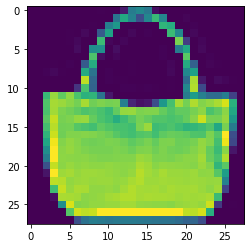

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[100])
plt.grid(False)
plt.show()

In [ ]:
train_images[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  18,
        107, 119, 103,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 155,
        113,  61, 118, 173, 117,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 110, 136,   0,
          0,   0,   0,   0, 167, 159,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   6,   0,  72, 147,   0,   0,
          5,   0,   2,   0,   0, 174, 118,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   5,   0,   0, 174,   4,   0,   4,
          0,   0,   0,   0,   0,   0, 204,  44,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   8,   0, 125, 128,   0,   9,   0,
          0,   0,   0,   0,   2,   0, 107, 152,   0,   6,   0,   0,   0,
          0,   0],
       [  